In [1]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras import layers

# Assignment 6: Cat and Dog recognition

In this assignment you will build a convolutional neural network (CNN) that is able to tell whether an image shows a cat or a dog. Furthermore, since we don’t have that many data to train our mode with, we will train another model that uses as a base the existing CNN model VGG16 that has frequently shown a very good performance in classifying images in datasets with hundreds or even thousands of possible classes. Lastly, you will evaluate the performance of the model and classify your own pet images. 

## Exercise 06.1: Training the CNN

What we want to do first is load all the images into arrays in RAM. The final goal should be a training set numpy array with a shape (23000,64, 64, 3) and a test set numpy array with a shape (2000, 64, 64, 3) containing all the images, where 23000 and 2000 are the total number of cat and dog images, 64x64 is the pixel size of each image and 3 is the number of color channels. You might not end up with a total of 25000 images because some images are corrupted. In any case, the test set should have 1000 cat images and 1000 dog images and the rest goes into the training set. Prepare these arrays, by resizing all of the images to 64x64 pixels and converting them into numpy arrays containing the RGB values of each pixel (convert the grey scale images accordingly). For this you might want to install and use the pillow library together with its Image functionalities such as resize and convert. Additionally, create two arrays with shapes (23000, 1) and (2000, 1) containing the corresponding labels (1 if the image shows a cat and 0 if it shows a dog).

Finally, normalize the RGB values that go from 0 to 255 to values between 0 and 1. Loading and preparing the arrays might take some time (if you want to monitor the progress, you can add progress bars with the tqdm library)!

Checking which images are corrupted:

In [2]:
for i in range(12500):
    try:
        Image.open(f"/Users/jercheal/Documents/Physics/CPIV_ML/PetImages/Cat/{i}.jpg")
    except:
        print(f"Cat image {i} is corrupted")

for i in range(12500):
    try:
        Image.open(f"/Users/jercheal/Documents/Physics/CPIV_ML/PetImages/Dog/{i}.jpg")
    except:
        print(f"Dog image {i} is corrupted")

Cat image 666 is corrupted


/opt/anaconda3/envs/CPIV/lib/python3.12/site-packages/PIL/TiffImagePlugin.py:949: UserWarning: Truncated File Read
  warnings.warn(str(msg))


Dog image 11702 is corrupted


Loading the images, resizing them, converting their RGB values into numpy arrays and normalizing by 250 such that the RGB values lie between 0 and 1.

In [61]:
cats_training = np.array([np.array(Image.open(f"/Users/jercheal/Documents/Physics/CPIV_ML/PetImages/Cat/{n}.jpg").resize((64, 64)).convert("RGB")) for n in range(11500) if n != 666]) /250
cats_test = np.array([np.array(Image.open(f"/Users/jercheal/Documents/Physics/CPIV_ML/PetImages/Cat/{n}.jpg").resize((64, 64)).convert("RGB")) for n in range(11500,12500)]) / 250
dogs_training = np.array([np.array(Image.open(f"/Users/jercheal/Documents/Physics/CPIV_ML/PetImages/Dog/{n}.jpg").resize((64, 64)).convert("RGB")) for n in range(11499)]) / 250
dogs_test = np.array([np.array(Image.open(f"/Users/jercheal/Documents/Physics/CPIV_ML/PetImages/Dog/{n}.jpg").resize((64, 64)).convert("RGB")) for n in range(11499,12500) if n != 11702]) / 250
training_data = np.concatenate((cats_training, dogs_training), axis=0)
training_labels = np.concatenate((np.ones(11499), np.zeros(11499)))
test_data = np.concatenate((cats_test, dogs_test), axis=0)
test_labels = np.concatenate((np.ones(1000), np.zeros(1000)))
training_data = np.expand_dims(training_data, -1)
test_data = np.expand_dims(test_data, -1)

/opt/anaconda3/envs/CPIV/lib/python3.12/site-packages/PIL/TiffImagePlugin.py:949: UserWarning: Truncated File Read
  warnings.warn(str(msg))


In [62]:
num_classes = 2
input_shape = (64, 64, 3)
training_labels = keras.utils.to_categorical(training_labels, num_classes)
test_labels = keras.utils.to_categorical(test_labels, num_classes)

In [76]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),        
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(128, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="sigmoid")
    ]
)

model.summary()


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_16 (Conv2D)              │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 12, 12, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_18 (MaxPooling2D) │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 128)            │       589,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 683,458 (2.61 MB)

 Trainable params: 683,458 (2.61 MB)

 Non-trainable params: 0 (0.00 B)

Training the model defined above for 100 epochs (1 epoch takes around 15ms)

In [77]:
batch_size = 64
epochs = 20

model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
model.fit(training_data, training_labels, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/20
324/324 ━━━━━━━━━━━━━━━━━━━━ 13s 38ms/step - accuracy: 0.5985 - loss: 0.6646 - val_accuracy: 0.8309 - val_loss: 0.4204
Epoch 2/20
324/324 ━━━━━━━━━━━━━━━━━━━━ 12s 38ms/step - accuracy: 0.7353 - loss: 0.5339 - val_accuracy: 0.8304 - val_loss: 0.3906
Epoch 3/20
324/324 ━━━━━━━━━━━━━━━━━━━━ 12s 38ms/step - accuracy: 0.7885 - loss: 0.4568 - val_accuracy: 0.7265 - val_loss: 0.5556
Epoch 4/20
324/324 ━━━━━━━━━━━━━━━━━━━━ 13s 39ms/step - accuracy: 0.8256 - loss: 0.3956 - val_accuracy: 0.8774 - val_loss: 0.3164
Epoch 5/20
324/324 ━━━━━━━━━━━━━━━━━━━━ 12s 38ms/step - accuracy: 0.8449 - loss: 0.3634 - val_accuracy: 0.8352 - val_loss: 0.3755
Epoch 6/20
324/324 ━━━━━━━━━━━━━━━━━━━━ 12s 38ms/step - accuracy: 0.8593 - loss: 0.3232 - val_accuracy: 0.8448 - val_loss: 0.3539
Epoch 7/20
324/324 ━━━━━━━━━━━━━━━━━━━━ 13s 39ms/step - accuracy: 0.8757 - loss: 0.2897 - val_accuracy: 0.8717 - val_loss: 0.2892
Epoch 8/20
324/324 ━━━━━━━━━━━━━━━━━━━━ 12s 38ms/step - accuracy: 0.8984 - loss: 0.2462 - 

In [117]:
score = model.evaluate(test_data, test_labels, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.6653155088424683
Test accuracy: 0.8374999761581421


Test the model with pictures of Merlino the cat

In [86]:
merlino = np.expand_dims(np.array([Image.open("/Users/jercheal/Documents/Physics/CPIV_ML/PetImages/Merlino.jpeg").resize((64, 64)).convert("RGB")]), -1)
rand_cat = np.expand_dims(np.array([Image.open("/Users/jercheal/Documents/Physics/CPIV_ML/PetImages/random_cat.jpeg").resize((64, 64)).convert("RGB")]), -1)
obvious_cat = np.expand_dims(np.array([Image.open("/Users/jercheal/Documents/Physics/CPIV_ML/PetImages/obvious_cat.jpg").resize((64, 64)).convert("RGB")]), -1)
print("The obvious cat is to ", model.predict(obvious_cat)[0, 1] * 100, "percent a cat.")
print("The random cat is to ", model.predict(rand_cat)[0, 1] * 100, "percent a cat.")
print("Merlino the cat is to ", model.predict(merlino)[0, 1] * 100, "percent a cat.") 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
The obvious cat is to  100.0 percent a cat.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
The random cat is to  100.0 percent a cat.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
Merlino the cat is to  100.0 percent a cat.


The trained model seems to already work well after 20 epochs. Included `layers.Dropout(0.5)` to decrease the chance of overfitting. 

## Exercise 06.2: Transfer Learning

We can easily improve our accuracy by using parts of a pretrained neural network and training only a few layers before the output layer. This is called transfer learning. For our example we are going to use VGG16, which is a deep CNN used for image classification tasks.

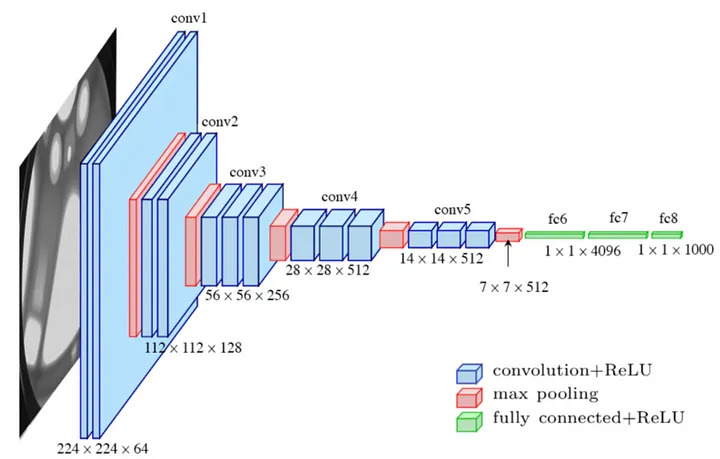

In [90]:
Image.open("/Users/jercheal/Documents/Physics/CPIV_ML/VGG16_architecture.jpg")

Above, we see the VGG16 architecture. The training data we pre-process below will then have the shape 7 x 7 x 512. From there on, we can build a model, mimicking the last layers of the CNN and feed to it the pre-processed data.

Loading the VGG16 model

In [49]:
vgg16_model = keras.applications.vgg16.VGG16(include_top=False, input_shape=(224, 224, 3))

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [188]:
#cats_training_pre = np.array([np.array(Image.open(f"/Users/jercheal/Documents/Physics/CPIV_ML/PetImages/Cat/{n}.jpg").resize((224, 224)).convert("RGB")) for n in range(11500) if n != 666]) 
#cats_test_pre = np.array([np.array(Image.open(f"/Users/jercheal/Documents/Physics/CPIV_ML/PetImages/Cat/{n}.jpg").resize((224, 224)).convert("RGB")) for n in range(11500,12500)]) 
#dogs_training_pre = np.array([np.array(Image.open(f"/Users/jercheal/Documents/Physics/CPIV_ML/PetImages/Dog/{n}.jpg").resize((224, 224)).convert("RGB")) for n in range(11499)]) 
#dogs_test_pre = np.array([np.array(Image.open(f"/Users/jercheal/Documents/Physics/CPIV_ML/PetImages/Dog/{n}.jpg").resize((224, 224)).convert("RGB")) for n in range(11499,12500) if n != 11702]) 
#training_data_pre = np.concatenate((cats_training_pre, dogs_training_pre), axis=0)
training_labels_pre = np.concatenate((np.ones(11499), np.zeros(11499)))
training_labels_pre = keras.utils.to_categorical(training_labels_pre, num_classes)
#test_data_pre = np.concatenate((cats_test_pre, dogs_test_pre), axis=0)
test_labels_pre = np.concatenate((np.ones(1000), np.zeros(1000)))
test_labels_pre = keras.utils.to_categorical(test_labels_pre, num_classes)
#training_data = np.expand_dims(training_data, -1)
#test_data = np.expand_dims(test_data, -1)

Initialize the data for the VGG16 model 

In [139]:
training_data_vgg16 = keras.applications.vgg16.preprocess_input(np.copy(training_data_pre))
test_data_vgg16 = keras.applications.vgg16.preprocess_input(np.copy(test_data_pre))

Train the model using VGG16 (takes around 34 mins)

In [68]:
training_data_after_vgg16 = vgg16_model.predict(training_data_vgg16, verbose=1)

719/719 ━━━━━━━━━━━━━━━━━━━━ 2004s 3s/step


In [98]:
input_shape_vgg16 = (7, 7, 512)
model_after_vgg16 = keras.Sequential(
    [
        keras.Input(shape=input_shape_vgg16),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="sigmoid")
    ]
)

model_after_vgg16.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_9 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 64)             │     1,605,696 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,605,826 (6.13 MB)

 Trainable params: 1,605,826 (6.13 MB)

 Non-trainable params: 0 (0.00 B)

In [181]:
batch_size = 64
epochs = 20

model_after_vgg16.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
model_after_vgg16.fit(np.expand_dims(training_data_after_vgg16, -1), training_labels, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/20
324/324 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9936 - loss: 0.0196 - val_accuracy: 0.9852 - val_loss: 0.1613
Epoch 2/20
324/324 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9943 - loss: 0.0171 - val_accuracy: 0.9878 - val_loss: 0.1897
Epoch 3/20
324/324 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9946 - loss: 0.0226 - val_accuracy: 0.9783 - val_loss: 0.3403
Epoch 4/20
324/324 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9940 - loss: 0.0176 - val_accuracy: 0.9822 - val_loss: 0.2969
Epoch 5/20
324/324 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9923 - loss: 0.0246 - val_accuracy: 0.9826 - val_loss: 0.2321
Epoch 6/20
324/324 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9933 - loss: 0.0213 - val_accuracy: 0.9783 - val_loss: 0.2592
Epoch 7/20
324/324 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9931 - loss: 0.0204 - val_accuracy: 0.9830 - val_loss: 0.2377
Epoch 8/20
324/324 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9935 - loss: 0.0184 - val_accuracy: 0.

In [170]:
test_data_after_vgg16 = vgg16_model.predict(test_data_vgg16, verbose=1)

63/63 ━━━━━━━━━━━━━━━━━━━━ 87s 1s/step


In [191]:
score_pre = model_after_vgg16.evaluate(np.expand_dims(test_data_after_vgg16, -1), test_labels_pre, verbose=0)
print("Test loss:", score_pre[0])
print("Test accuracy:", score_pre[1])

Test loss: 0.22361396253108978
Test accuracy: 0.9884999990463257


The accuracy with the pre-trained model has improved significantly! Let us now check random cat pictures of the test set: 

In [197]:
import random
indeces = []
for n in range(10):
    indeces.append(random.randint(0, 999))

In [198]:
model_after_vgg16.predict(np.expand_dims(test_data_after_vgg16, -1)[indeces])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


array([[0.0000000e+00, 1.0000000e+00],
       [2.4622243e-31, 1.0000000e+00],
       [0.0000000e+00, 1.0000000e+00],
       [0.0000000e+00, 1.0000000e+00],
       [0.0000000e+00, 1.0000000e+00],
       [0.0000000e+00, 1.0000000e+00],
       [2.4622243e-31, 1.0000000e+00],
       [0.0000000e+00, 1.0000000e+00],
       [0.0000000e+00, 1.0000000e+00],
       [0.0000000e+00, 1.0000000e+00]], dtype=float32)

The accuracy seems very high for the ten randomly chosen cat pictures. Let's find ten misclassified cats!

In [204]:
cat_predictions = model_after_vgg16.predict(np.expand_dims(test_data_after_vgg16, -1)[0:1000])
misclassifications = []
for n in range(1000):
    if cat_predictions[n, 1] < 0.5:
        misclassifications.append(n)

misclassifications

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 726us/step


[44, 65, 67, 224, 299, 370, 528, 676, 772, 826, 859, 893]

In [206]:
for n in misclassifications:
    Image.open(f"/Users/jercheal/Documents/Physics/CPIV_ML/PetImages/Cat/{11500 + n}.jpg").show()

The misclassifications are quite amusing. Here are a few reasons why these might have happened:\
    - A leash: on one of the pictures, a cat lies on the grass with a leash being clearly visible. I assume that many dog pictures include leashes.\
    - Weird haircut: one of the cats has weirdly cut fur that makes it look like a small dog.\
    - A dog on the picture: If a cat is shown together with a dog, then the data input is ambiguous.\
    - Kittens show similar properties to puppies and seem to be harder to distinguish.


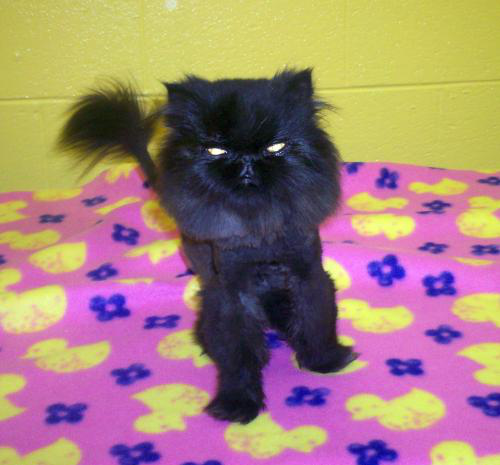

In [213]:
Image.open(f"/Users/jercheal/Documents/Physics/CPIV_ML/PetImages/Cat/{11500 + 528}.jpg")

This is my favourite!